In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#Directly importing the dataset from kaggle using the personal API key(Can be downloaded from the kaggle profile section)
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:29<00:00, 42.3MB/s]
100% 1.06G/1.06G [00:29<00:00, 38.8MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#Importing the neccessary Libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int', #cat=0 dog=1
    batch_size=32,
    image_size=(256,256) #Making all images of same size
)
#We are creating a validation dataset from the 'test' directory to evaluate the model's performance on unseen data. This dataset will be used during model
# training to assess how well the model generalizes to images it has not seen before. By specifying the 'image_size' and 'batch_size' parameters, we ensure
# that the validation images are processed in a consistent manner, and their labels are inferred as integers for model evaluation.
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)
#To make all pixel values between 0 and 1 which are between 0 and 255 in normal case

In [ ]:
# create CNN model

model = Sequential()
#32 filter convolution layer
model.add(Conv2D(32 ,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
#64 filter convolution layer
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
#1128 filter convolution layer
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 83s 109ms/step - loss: 1.2760 - accuracy: 0.5917 - val_loss: 0.6586 - val_accuracy: 0.6456
Epoch 2/10
625/625 [==============================] - 66s 104ms/step - loss: 0.5690 - accuracy: 0.7093 - val_loss: 0.6590 - val_accuracy: 0.6692
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4958 - accuracy: 0.7650 - val_loss: 0.5068 - val_accuracy: 0.7426
Epoch 4/10
625/625 [==============================] - 70s 112ms/step - loss: 0.4412 - accuracy: 0.7963 - val_loss: 0.4585 - val_accuracy: 0.7816
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3650 - accuracy: 0.8368 - val_loss: 1.2677 - val_accuracy: 0.6448
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3377 - accuracy: 0.8561 - val_loss: 0.4438 - val_accuracy: 0.8294
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2272 - accuracy: 0.9066 - val_loss: 0.4876 - val_ac

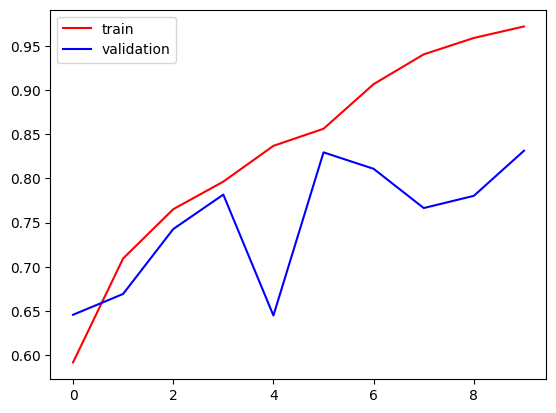

In [ ]:
import matplotlib.pyplot as plt
#Checking the accuracy or correctness of the model by plotting the training and validation
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

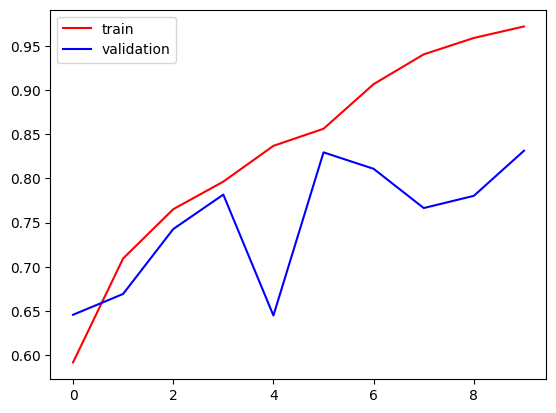

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

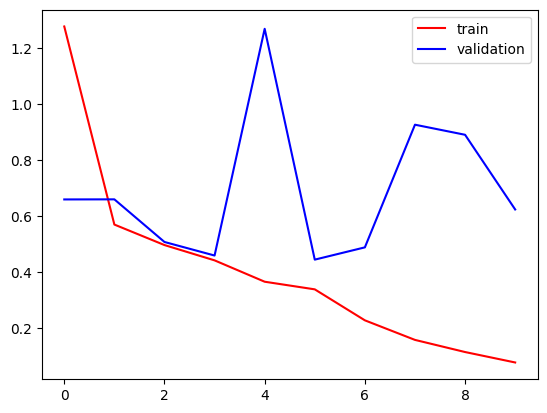

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

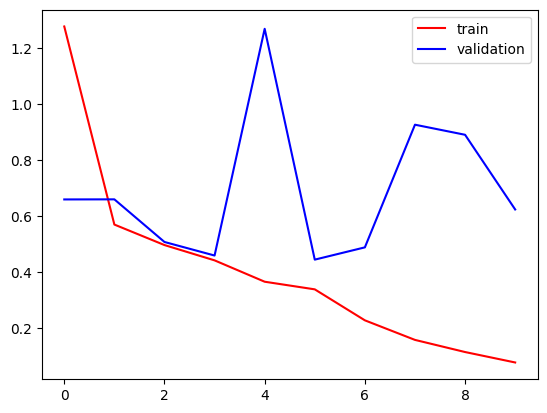

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
#Any random cat/dog Image for testing our model
test_img = cv2.imread('/content/dog.jpeg')

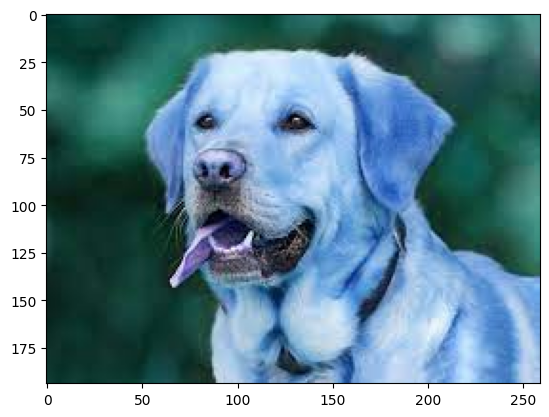

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(194, 259, 3)

In [ ]:
#Resizing the test image
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
#Predicting the test image(Resized)
model.predict(test_input)

1/1 [==============================] - 0s 30ms/step


array([[1.]], dtype=float32)